In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/anz/anaconda3/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def gen(num_train=1000,num_feature=5):
    gen_graph =  tf.Graph()
    with gen_graph.as_default():
        w = tf.random_normal([num_feature,1])
        b = tf.Variable(np.random.rand())
        x = tf.random_normal(shape=[num_train,num_feature])
        y = tf.matmul(x,w)+b
    with tf.Session(graph=gen_graph) as sess:
        sess.run(tf.global_variables_initializer())
        x,y,w,b =sess.run([x,y,w,b])
        return x,y,w,b

In [3]:
# X : matrix mxn
# w : matrix nx1
# y : matrix mx1
# b : scalar
def linreg(x,y,iterations=1000,lr=0.01):
    num_train = x.shape[0]
    num_feature = x.shape[1]
    losses = []
    w = tf.Variable(tf.zeros([num_feature,1]))
    b = tf.Variable(np.random.rand())
    x_t = tf.placeholder(tf.float32,shape=[None,num_feature])
    y_t = tf.matmul(x_t,w)+b
    loss = 0.5 * tf.reduce_mean(tf.square(y_t-y),0)
    update_w = w.assign(tf.subtract(w,tf.matmul(tf.transpose(x),(y_t-y))*(1.0/num_train)*lr))
    update_b = b.assign(tf.subtract(b,tf.reduce_mean(y_t-y)*lr))
    with tf.Session(graph=tf.get_default_graph()) as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(iterations):
            _loss,_w,_b,_x,_u,_b=sess.run([loss,w,b,x_t,update_w,update_b],feed_dict={x_t : x})
            losses.append(_loss)
            print(_loss)
    plt.plot(losses)
    plt.show()
    print('Prediction w ',_w)
    print('Prediction b ',_b)
    
        
        

[1.9071631]
[1.8715144]
[1.8365327]
[1.8022071]
[1.7685235]
[1.735471]
[1.7030375]
[1.6712111]
[1.6399807]
[1.6093353]
[1.5792634]
[1.549755]
[1.5207989]
[1.492385]
[1.4645029]
[1.4371428]
[1.4102951]
[1.3839498]
[1.3580974]
[1.3327287]
[1.3078352]
[1.2834079]
[1.2594371]
[1.2359153]
[1.2128335]
[1.1901839]
[1.1679578]
[1.1461477]
[1.1247456]
[1.1037441]
[1.0831355]
[1.0629126]
[1.0430675]
[1.0235941]
[1.0044847]
[0.98573303]
[0.967332]
[0.949275]
[0.9315559]
[0.9141683]
[0.89710575]
[0.88036215]
[0.8639317]
[0.84780884]
[0.83198714]
[0.81646127]
[0.8012257]
[0.7862751]
[0.77160406]
[0.7572072]
[0.7430795]
[0.72921586]
[0.71561134]
[0.7022613]
[0.68916065]
[0.67630506]
[0.66368955]
[0.6513097]
[0.6391615]
[0.6272401]
[0.6155419]
[0.6040618]
[0.59279627]
[0.58174145]
[0.57089305]
[0.5602474]
[0.54980063]
[0.5395492]
[0.52948916]
[0.5196172]
[0.50992936]
[0.50042254]
[0.49109343]
[0.48193848]
[0.4729546]
[0.46413833]
[0.45548695]
[0.44699708]
[0.43866563]
[0.43048984]
[0.42246678]
[0.414

[7.2682883e-07]
[7.135271e-07]
[7.0047787e-07]
[6.87718e-07]
[6.750436e-07]
[6.626933e-07]
[6.5057384e-07]
[6.3869305e-07]
[6.270634e-07]
[6.1556676e-07]
[6.043053e-07]
[5.932927e-07]
[5.82405e-07]
[5.7172275e-07]
[5.612763e-07]
[5.510396e-07]
[5.4094545e-07]
[5.3106174e-07]
[5.213714e-07]
[5.1179643e-07]
[5.0244415e-07]
[4.932877e-07]
[4.8421464e-07]
[4.753714e-07]
[4.6671266e-07]
[4.5815315e-07]
[4.4978603e-07]
[4.4161814e-07]
[4.33538e-07]
[4.2563676e-07]
[4.1782036e-07]
[4.1018785e-07]
[4.027253e-07]
[3.953535e-07]
[3.8813377e-07]
[3.8100458e-07]
[3.7405556e-07]
[3.6717665e-07]
[3.6045745e-07]
[3.538906e-07]
[3.474137e-07]
[3.4109584e-07]
[3.3482283e-07]
[3.2873584e-07]
[3.226836e-07]
[3.1679332e-07]
[3.109706e-07]
[3.0530438e-07]
[2.9968538e-07]
[2.9420997e-07]
[2.8878745e-07]
[2.8351985e-07]
[2.7830134e-07]
[2.7322582e-07]
[2.681775e-07]
[2.632873e-07]
[2.5844614e-07]
[2.5372742e-07]
[2.4906637e-07]
[2.4452444e-07]
[2.400313e-07]
[2.3566233e-07]
[2.3134932e-07]
[2.271324e-07]
[2.

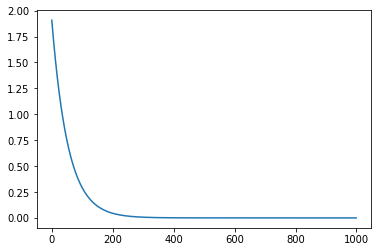

Prediction w  [[ 0.43019786]
 [ 0.4153259 ]
 [-0.41585618]
 [ 0.46104062]
 [ 1.8101432 ]]
Prediction b  0.73643965
Real w values  [[ 0.4302298 ]
 [ 0.4153434 ]
 [-0.41585207]
 [ 0.46110803]
 [ 1.810307  ]]
Real b values  0.73648757


In [4]:
x,y,w,b=gen()
linreg(x,y)
print('Real w values ',w)
print('Real b values ',b)